In [28]:
import folium
import matplotlib.pyplot as plt
from scipy import stats
import calplot

from bokeh.models import ColumnDataSource, FactorRange, Legend
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [1]:
# the dataload and cleaning from week 1
%run load_clean_data.py
df = df ## This line is just to make it more readable in python (as now the color coding is working)
print(df.head())

/Users/kristineandersen/Desktop/Socialdata/load_clean_data.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned['Date'] = pd.to_datetime(df2_cleaned['Date']).dt.strftime('%Y/%m/%d')


        Date   Time DayOfWeek       Category PdDistrict           X  \
0 2004-11-22  17:50    Monday        ROBBERY  INGLESIDE -122.420084   
1 2005-10-18  20:00   Tuesday  VEHICLE THEFT       PARK -120.500000   
2 2004-02-15  02:00    Sunday  VEHICLE THEFT   SOUTHERN -120.500000   
3 2011-02-18  05:27    Friday          ARSON  INGLESIDE -122.436220   
4 2010-11-21  17:00    Sunday        ASSAULT   SOUTHERN -122.410541   

           Y  Month  
0  37.708311     11  
1  90.000000     10  
2  90.000000      2  
3  37.724377      2  
4  37.770913     11  


In [2]:
crime_type = "SUICIDE"

# Filter the dataset
df_filtered = df[
    (df["Category"] == crime_type) 
]

# Calender plot

In [3]:
days_difference = (df_filtered['Date'].max().date() - df_filtered['Date'].min().date()).days
daily_incidents = df_filtered.groupby(df_filtered['Date'].dt.date).size()
all_days = pd.date_range(str(df_filtered['Date'].min().date()), periods=days_difference, freq='D')
days = df_filtered['Date'].unique()
events = pd.Series(daily_incidents, index=days)

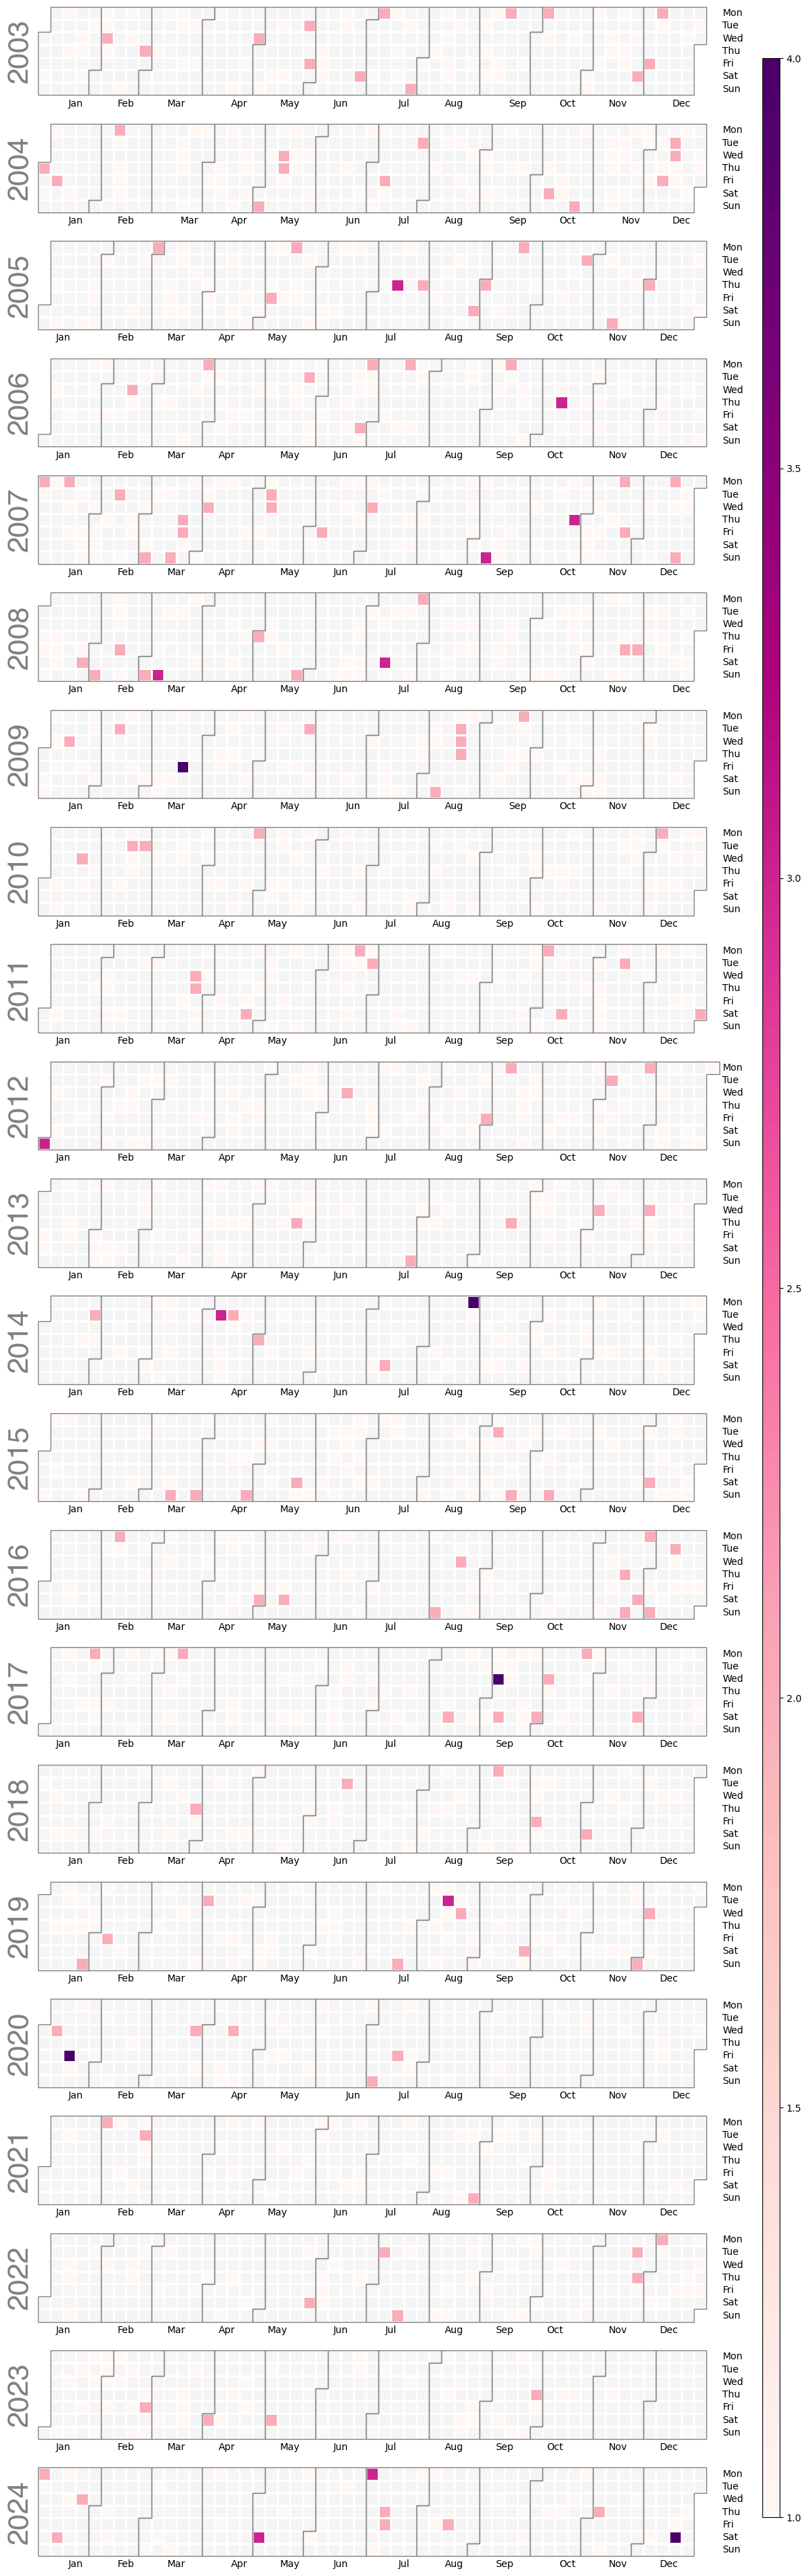

In [5]:
calplot.calplot(events, cmap='RdPu', colorbar=True)
plt.savefig("calendar_plot.png")

# Map

In [6]:
df_filtered = df_filtered.dropna(subset=["Y", "X"])

san_fran = folium.Map([37.773972, -122.431297], zoom_start=13)
for index, row in df_filtered.iterrows():
    folium.CircleMarker([row["Y"], row["X"]], radius=1, color='red').add_to(san_fran)

san_fran.save("map.html")
san_fran

# Bokeh

In [19]:
df_filtered['Month'] = pd.to_datetime(df_filtered['Date']).dt.month_name().str[:3]
df_filtered['Year'] = pd.to_datetime(df_filtered['Date']).dt.year.astype(str)

Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_counts = df_filtered.pivot_table(index='Year', columns='Month', aggfunc='size', fill_value=0)
month_counts = month_counts[Month]  # Sort columns by the predefined Month list

In [25]:
source = ColumnDataSource(month_counts)

In [29]:
p = figure(title="Yearly suicides by Month", x_axis_label='Year', y_axis_label='Count', x_range=FactorRange(factors=[str(i) for i in range(2003, 2024)]),toolbar_location=None)
colors = ["darkred", "crimson","palevioletred","lightcoral", "mistyrose", "lavender", "thistle", "orchid", "mediumpurple", "darkorchid", "purple", "indigo"]

p.add_layout(Legend(), 'right')
#p.legend.location = "left"
p.legend.orientation = "vertical"
p.vbar_stack(month_counts.columns, x='Year', width=0.9, source=source, legend_label=list(month_counts.columns), color=colors[:len(month_counts.columns)])
p.xaxis.major_label_orientation = 0.8  # Angle the x-axis labels

In [30]:
from bokeh.plotting import output_file, save
output_notebook() 
p.legend.click_policy="mute" 
show(p) 


output_file("bokeh_plot.html")
save(p)

Loading BokehJS ...

'/Users/kristineandersen/Desktop/Socialdata/bokeh_plot.html'